In [2]:
import sympy as sp

def biseccion_iterativo(expr, variable, a, b, tol=1e-6, max_iter=100):
    f = sp.lambdify(variable, expr)
    print(f'F(a) {f(a)}')
    print(f'F(b) {f(b)}')
    print(f(a) * f(b))
    if f(a) * f(b) > 0:
        raise ValueError("La función no cambia de signo en el intervalo dado.")
    
    # Mostrar los encabezados de la tabla
    print(f"{'n':<6}{'a':<16}{'b':<16}{'p':<16}{'f(a)':<16}{'f(b)':<16}{'f(p)':<16}{'f(a)*f(p)':<16}{'Error':<16}")
    print("="*96)
    
    iteraciones = 0
    while (b - a) / 2 > tol and iteraciones < max_iter:
        p = (a + b) / 2  # Punto medio
        fa = f(a)
        fb = f(b)
        fp = f(p)
        fa_fp = fa * fp
        error = abs(b - a) / 2  # Error aproximado en cada iteración
        
        # Imprimir los valores de la iteración
        print(f"{iteraciones+1:<6}{a:<16.6f}{b:<16.6f}{p:<16.6f}{fa:<16.6f}{fb:<16.6f}{fp:<16.6f}{fa_fp:<16.6f}{error:<16.6f}")
        
        if fp == 0:  # Solución exacta encontrada
            return p
        elif fa * fp < 0:
            b = p  # La raíz está en [a, p]
        else:
            a = p  # La raíz está en [p, b]
        
        iteraciones += 1

    p = (a + b) / 2  # Aproximación final
    fa = f(a)
    fb = f(b)
    fp = f(p)
    fa_fp = fa * fp
    error = abs(b - a) / 2
    
    # Imprimir la última iteración
    print(f"{iteraciones+1:<6}{a:<16.6f}{b:<16.6f}{p:<16.6f}{fa:<16.6f}{fb:<16.6f}{fp:<16.6f}{fa_fp:<16.6f}{error:<16.6f}")
    
    return p

# Ejemplo de uso
if __name__ == "__main__":
    # Definir la ecuación simbólica
    x = sp.Symbol('x')
    expr = x * sp.cos(x) - 2 * x**2 + 3*x -1 # Ejemplo de ecuación
    tol=1e-5
    max_iter=100
    # Intervalo inicial
    a = 0.2
    b = 0.3
    
    # Llamar al método de bisección
    try:
        raiz = biseccion_iterativo(expr, x, a, b, tol, max_iter)
        print("\nLa raíz aproximada es:", raiz)
    except ValueError as e:
        print(f"Error: {e}")


F(a) -0.28398668443175157
F(b) 0.0066009467376817454
-0.0018745809781448258
n     a               b               p               f(a)            f(b)            f(p)            f(a)*f(p)       Error           
1     0.200000        0.300000        0.250000        -0.283987       0.006601        -0.132772       0.037705        0.050000        
2     0.250000        0.300000        0.275000        -0.132772       0.006601        -0.061583       0.008177        0.025000        
3     0.275000        0.300000        0.287500        -0.061583       0.006601        -0.027113       0.001670        0.012500        
4     0.287500        0.300000        0.293750        -0.027113       0.006601        -0.010161       0.000275        0.006250        
5     0.293750        0.300000        0.296875        -0.010161       0.006601        -0.001756       0.000018        0.003125        
6     0.296875        0.300000        0.298438        -0.001756       0.006601        0.002428        -0.000004   

In [5]:
import sympy as sp

def puntoFijo(expr, variable, x0, tol=1e-6, max_iter=100):
    """
    Método de Punto Fijo para resolver g(x) = x.

    Parámetros:
    - expr: La expresión simbólica de g(x).
    - variable: La variable simbólica en la ecuación.
    - x0: El valor inicial para la iteración.
    - tol: La tolerancia para el criterio de parada.
    - max_iter: El número máximo de iteraciones.

    Retorna:
    - La raíz aproximada o un error si no converge.
    """
    g = sp.lambdify(variable, expr)  # Convertir g(x) en una función evaluable

    iteraciones = 0
    error = float('inf')
    x_prev = x0

    print("Iteración | Aproximación       | Error relativo    ")
    print("-------------------------------------------------")

    while error > tol and iteraciones < max_iter:
        x_next = g(x_prev)  # Evaluar g(x_prev)
        error = abs(x_next - x_prev)  # Calcular el error absoluto

        # Imprimir con notación científica si los números son grandes
        print(f"{iteraciones + 1:<10} | {x_next:<13.6e} | {error:<13.6e}")

        x_prev = x_next
        iteraciones += 1

    # Comprobación de convergencia
    if error <= tol:
        return x_next  # Retorna la raíz aproximada
    else:
        raise ValueError("El método no converge después del número máximo de iteraciones.")

if __name__ == "__main__":
    # Definir la ecuación simbólica
    x = sp.Symbol('x')
    expr = (x**3 - 7 * x**2 + 14 * x - 6) / 14 + x  # Ejemplo g(x), ya reescrita

    # Parámetros
    x0 = 3.5  # Punto inicial
    tol = 1e-6
    max_iter = 100

    # Llamar al método de punto fijo
    try:
        raiz = puntoFijo(expr, x, x0, tol, max_iter)
        print("\nLa raíz aproximada es:", f"{raiz:.6e}")
    except ValueError as e:
        print(f"Error: {e}")


Iteración | Aproximación       | Error relativo    
-------------------------------------------------
1          | 3.508929e+00  | 8.928571e-03 
2          | 3.518993e+00  | 1.006462e-02 
3          | 3.530387e+00  | 1.139340e-02 
4          | 3.543346e+00  | 1.295974e-02 
5          | 3.558169e+00  | 1.482241e-02 
6          | 3.575228e+00  | 1.705962e-02 
7          | 3.595006e+00  | 1.977735e-02 
8          | 3.618128e+00  | 2.312206e-02 
9          | 3.645429e+00  | 2.730082e-02 
10         | 3.678043e+00  | 3.261421e-02 
11         | 3.717555e+00  | 3.951186e-02 
12         | 3.766246e+00  | 4.869090e-02 
13         | 3.827525e+00  | 6.127903e-02 
14         | 3.906721e+00  | 7.919683e-02 
15         | 4.012652e+00  | 1.059301e-01 
16         | 4.160988e+00  | 1.483365e-01 
17         | 4.382394e+00  | 2.214062e-01 
18         | 4.745352e+00  | 3.629577e-01 
19         | 5.435633e+00  | 6.902813e-01 
20         | 7.141199e+00  | 1.705565e+00 
21         | 1.436816e+01  | 7.226961e

OverflowError: (34, 'Result too large')

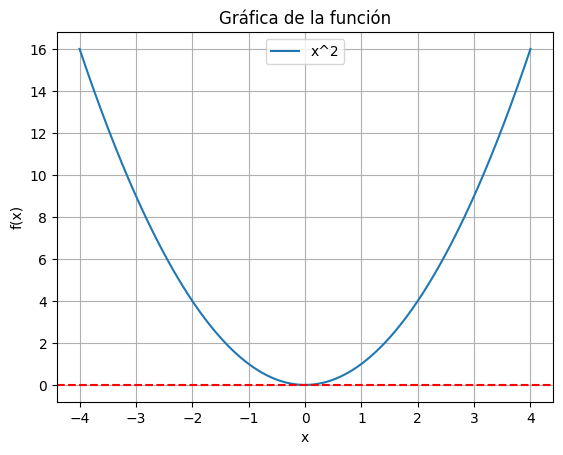

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x_vals = np.linspace(-4, 4, 500)
#y_vals = 2 * x_vals + 3 * np.cos(x_vals) -  np.exp(2 * x_vals)
y_vals = x_vals**2

plt.plot(x_vals, y_vals, label="x^2")
plt.axhline(0, color="red", linestyle="--")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfica de la función")
plt.grid()
plt.show()
